In [1]:
import os

import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as np

%matplotlib inline

In [2]:
from burst import kl_divergence_filter, load_basis
from utils import make_plots

In [3]:
prng_key = jax.random.PRNGKey(0)

bounds = dict(
    amplitude=(10, 80),
    frequency=(1, 9),
    bandwidth=(0.3, 0.7),
    phase=(0, np.pi),
)
duration = 4
sample_rate = 256

In [4]:
basis, weights, projection = load_basis("sinegaussian_svd.pkl", truncation=20)

Running 0.3_8
Signals loaded, with shape (2832, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

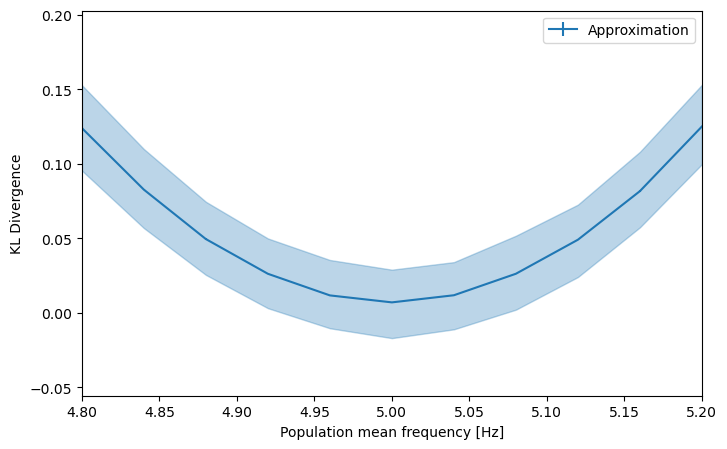

Running 0.4_8
Signals loaded, with shape (2774, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

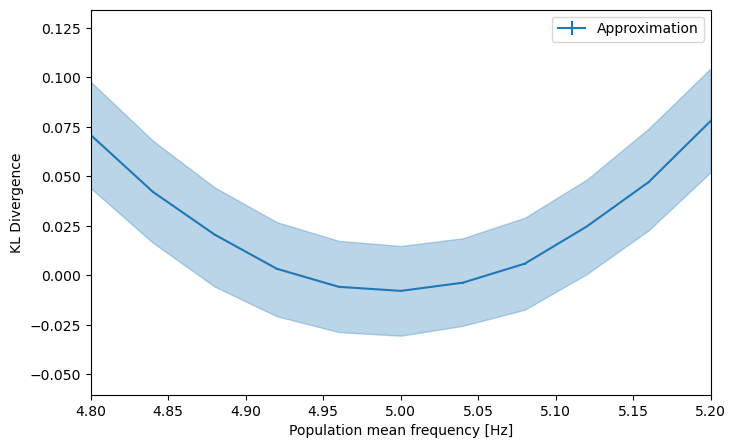

Running 0.6_8
Signals loaded, with shape (2815, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

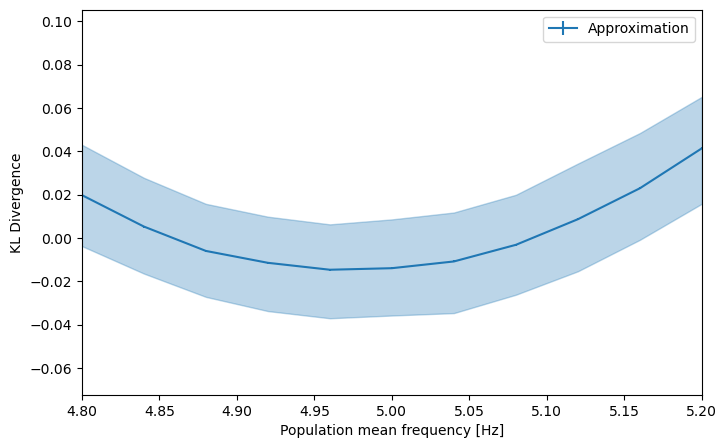

Running 0.8_8
Signals loaded, with shape (2796, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

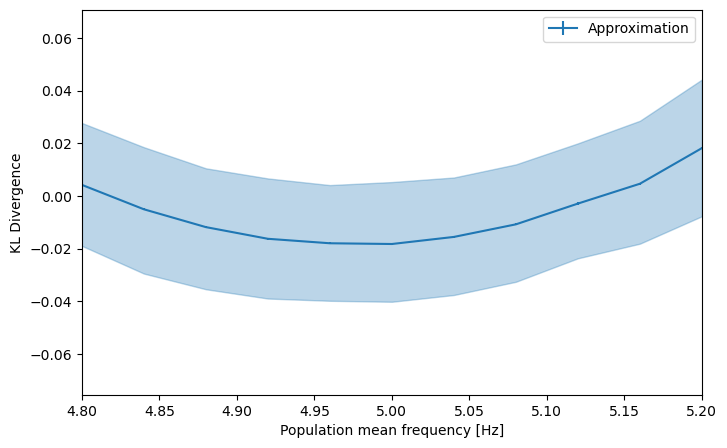

Running 0.35_0
Signals loaded, with shape (3000, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

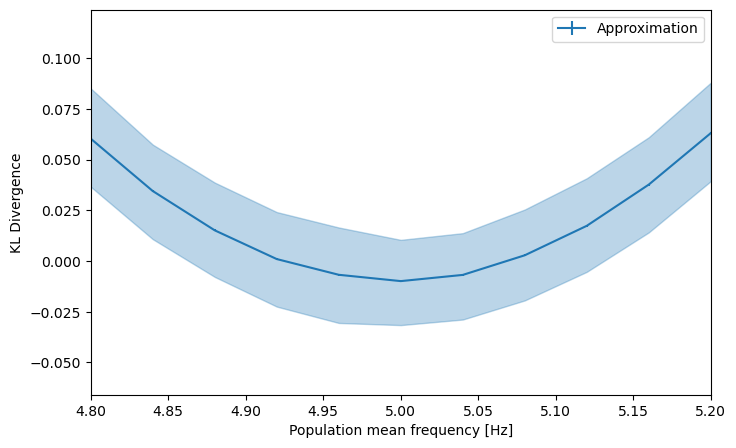

Running 0.45_0
Signals loaded, with shape (3000, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

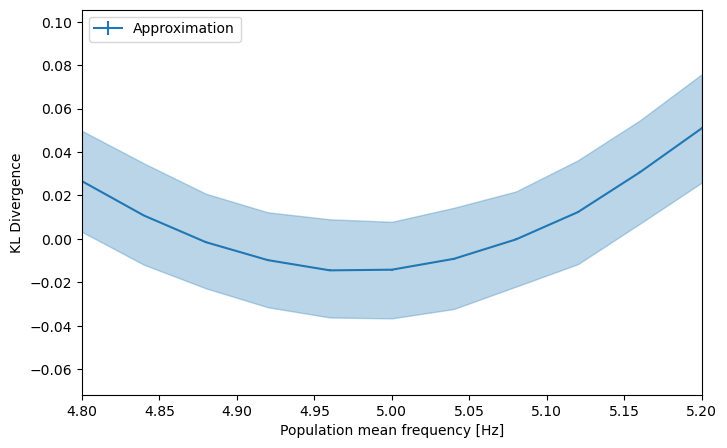

Running 0.65_0
Signals loaded, with shape (3000, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

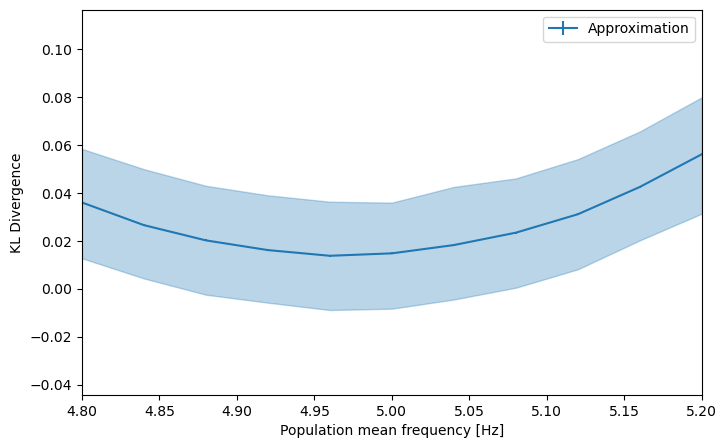

Running 0.85_0
Signals loaded, with shape (3000, 20)


  0%|          | 0/11000 [00:00<?, ?it/s]

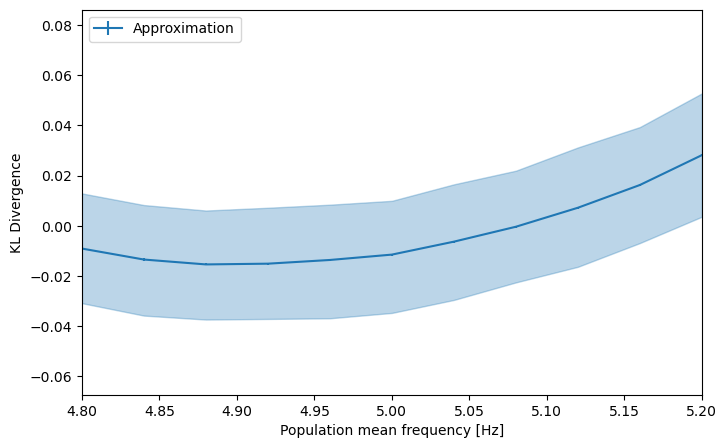

In [8]:
simulate_kwargs = dict(
    basis=basis,
    projection=projection,
    bounds=bounds,
    duration=duration,
    sample_rate=sample_rate,
    time_align=True,
)

for sigma_pop in [0.3, 0.4, 0.6, 0.8, 0.35, 0.45, 0.65, 0.85]:
    if sigma_pop * 10 % 1 == 0:
        snr_threshold = 8
    else:
        snr_threshold = 0

    label = f"{sigma_pop}_{snr_threshold}"

    # if os.path.exists(f"kl_divs_{label}.npy") or not os.path.exists(f"data_{label}.pkl"):
    #     print(f"Skipping {label}")
    #     continue
    print(f"Running {label}")

    all_divs = list()
    simulation_kwargs = dict(
        sigma_frequency=sigma_pop,
        ntrials=1000,
        population_size=3000 + 3000 * (snr_threshold > 0),
        threshold=snr_threshold,
        **simulate_kwargs,
    )

    for _ in range(1):
        prng_key, subkey = jax.random.split(prng_key)
        ln_ls = kl_divergence_filter(subkey, **simulation_kwargs)
        all_divs.append(ln_ls)
    np.save(f"kl_divs_{label}.npy", np.array(all_divs))

    make_plots(np.linspace(4.8, 5.2, 11), *all_divs)


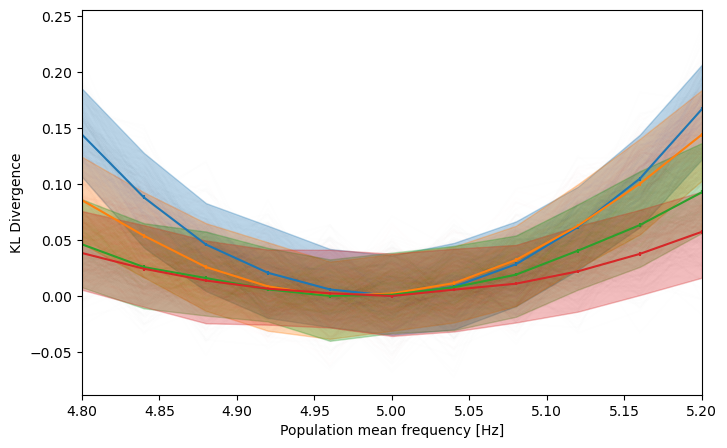

In [18]:
# make_plots(np.linspace(4.8, 5.2, 11), *all_divs[1:])
scaled = np.array(all_divs) - np.min(np.mean(np.array(all_divs), axis=-1), axis=-1)[:, None, None]
# scaled *= 4 / 5
# scaled *= 1 / 2
# scaled *= 5 / 4
make_plots(np.linspace(4.8, 5.2, 11), *scaled)